# Assignment - 3 

## Kaggle Competition - DonorChoose dataset

### Abstract

The purpose of this assignment is to apply different machine learning techniques to the dataset like classification, regression and predict how accurate my models with others participating in this competition.

Through this dataset, our aim is to predict whether teachers proposal on DonorChoose application would be accepted or not. 

### Purpose

The purpose of this assignment is to apply different machine learning techniques to the dataset like classification, regression and try to achieve accurate auc and roc curves for the model. 

### Methods Used: 

Exploratory Data Analysis, Logistic Regression models, Random Forest and XGBoost

### About the dataset 

Dataset contains information from teachers application to DonorChoose.org and has teacher, school and project related attributes. Based on this data, we will predict chances of teacher's application getting accepted. About 18k records are present in dataset. Inorder to analyze the whole dataset, we will be merging two data - train and resources to get a clear picture of the complete dataset which can be furthur used for analysis.

Dataset has 182080 records and 9 attributes. It has different types of attributes, some are multiclass categorical, numeric, binary columns. 

Here the target variable is: project_is_approved

### Exploring the dataset

We will be reading the dataset and importing into a dataframe and understand different statistical aspects of the dataset. We will check if null values are present in the dataset. 

In [9]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [10]:
# importing the dataset
df=pd.read_csv("train.csv", decimal = ',',date_parser="project_submitted_datetime")

train=pd.read_csv("train.csv")
resources=pd.read_csv("resources.csv")
test=pd.read_csv("test.csv")

In [11]:
#checking columns and first 5 rows of the dataset
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [12]:
df.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,182080.000000,182080.000000
mean,11.237055,0.847682
std,28.016086,0.359330
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,1.000000
75%,9.000000,1.000000
max,451.000000,1.000000


In [13]:
df.corr()

,teacher_number_of_previously_posted_projects,project_is_approved
teacher_number_of_previously_posted_projects,1.000000,0.065579
project_is_approved,0.065579,1.000000


## Data analysis and data cleaning

In this section, we will try to analyze the dataset in detail, try to find relationships between variables and clean the data if required for furthur analysis and model building. Following techniques will be used to analyze and clean the data. 

1. Find datatypes of the columns present in the dataset. 
2. Analyze null values and clean the data and convert data into proper format if required.
3. Find categorical columns and perform categorical encoding before we run the models. 
4. Convert project_submitted_datetime column into a readable datetime format and analyze whether useful information can be extracted. 
5. Perform data interpretation through different types of plots such as histogram, countplot, subplots, heatmaps. 

### 1. Datatypes of columns in dataset

In [14]:
df.dtypes

id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
project_essay_1                                 object
project_essay_2                                 object
project_essay_3                                 object
project_essay_4                                 object
project_resource_summary                        object
teacher_number_of_previously_posted_projects     int64
project_is_approved                              int64
dtype: object

### 2. Analyzing null values in the dataset

It is essential to always check for missing values in the dataset and quantity of missing values. Too many missing values could impact the quality of the dataset and analyzing dataset with missing values could give errorneous results. 

It is important to clean the dataset which could help in furthur analysis of the dataset. 

In [15]:
# Checking for null values
df.isnull().values.any()

True

In [16]:
df.isnull().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [17]:
df.isna().mean().round(4) * 100

id                                               0.0
teacher_id                                       0.0
teacher_prefix                                   0.0
school_state                                     0.0
project_submitted_datetime                       0.0
project_grade_category                           0.0
project_subject_categories                       0.0
project_subject_subcategories                    0.0
project_title                                    0.0
project_essay_1                                  0.0
project_essay_2                                  0.0
project_essay_3                                 96.5
project_essay_4                                 96.5
project_resource_summary                         0.0
teacher_number_of_previously_posted_projects     0.0
project_is_approved                              0.0
dtype: float64

We see from the above output that project_essay_3 and project_essay_4 has lot of null values. 

We see that 96.5% of the data doesnot have values for project_essay_3 and project_essay_4 in the training dataset.

In [18]:
df.isnull().sum().sum()

351416

In [19]:
print('Number of samples:',len(df))

Number of samples: 182080


In [20]:
df.drop('project_essay_3',axis=1,inplace=True)

In [21]:
df.drop('project_essay_4',inplace=True, axis = 1)

In [22]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,My students need a water filtration system for...,42,1


Although we have dropped both project_essay_3 and project_essay_4 from the dataset, we need to ensure that dataset does not contain any missing values and the data is clean. 

In [23]:
df.isnull().sum()

id                                              0
teacher_id                                      0
teacher_prefix                                  4
school_state                                    0
project_submitted_datetime                      0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_essay_1                                 0
project_essay_2                                 0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
dtype: int64

### Exploring the data and data interpretation through plots

We will try to plot some graphs and see if we can get useful information about the same. Lets try to see how many teachers have submitted the proposal and try to find a relationship if there are high chances of proposal getting accepted from a particular teacher. 

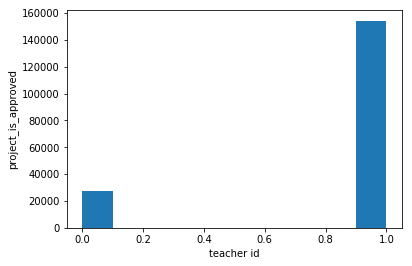

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['project_is_approved'])
plt.xlabel('teacher id')
plt.ylabel('project_is_approved')
plt.show()

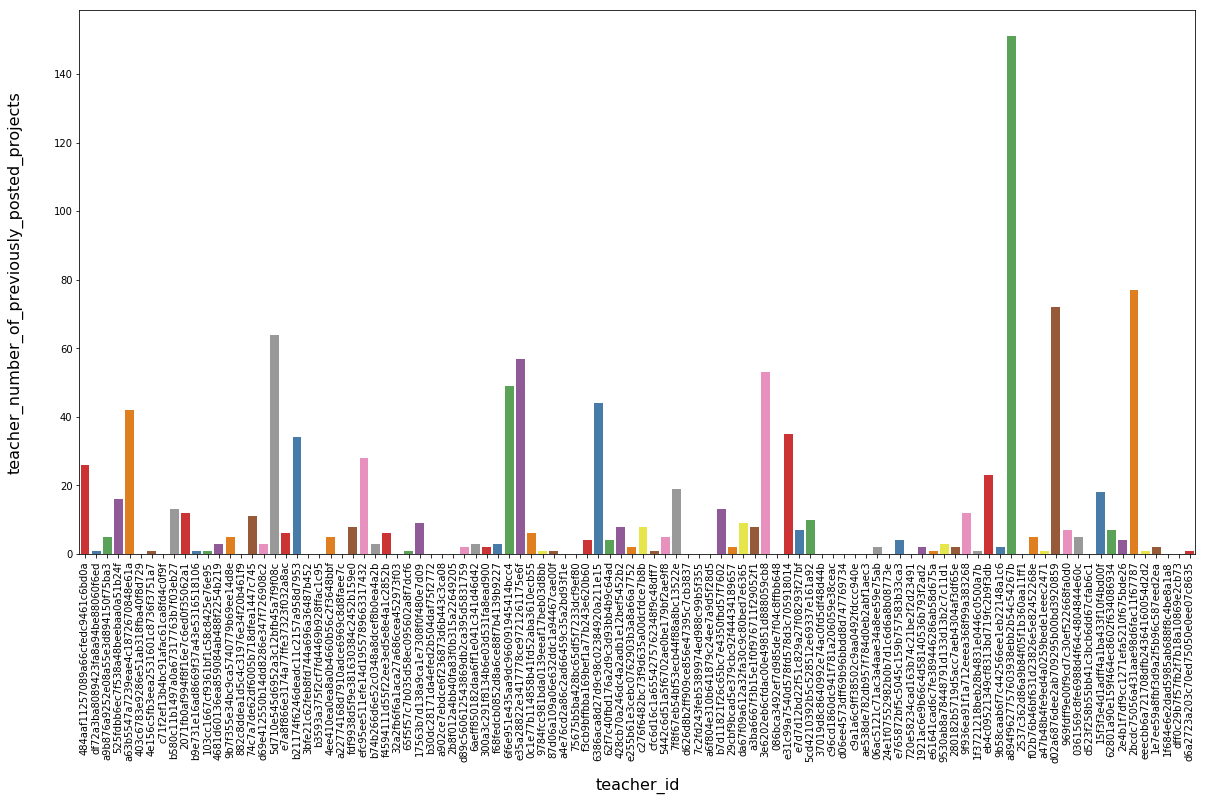

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='teacher_id', y='teacher_number_of_previously_posted_projects', data=df.head(100), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()


In [26]:
df_teacher_proposals = df[['teacher_id','teacher_number_of_previously_posted_projects']]


In [ ]:
df.groupby('teacher_id')[['teacher_number_of_previously_posted_projects','project_is_approved']].count()

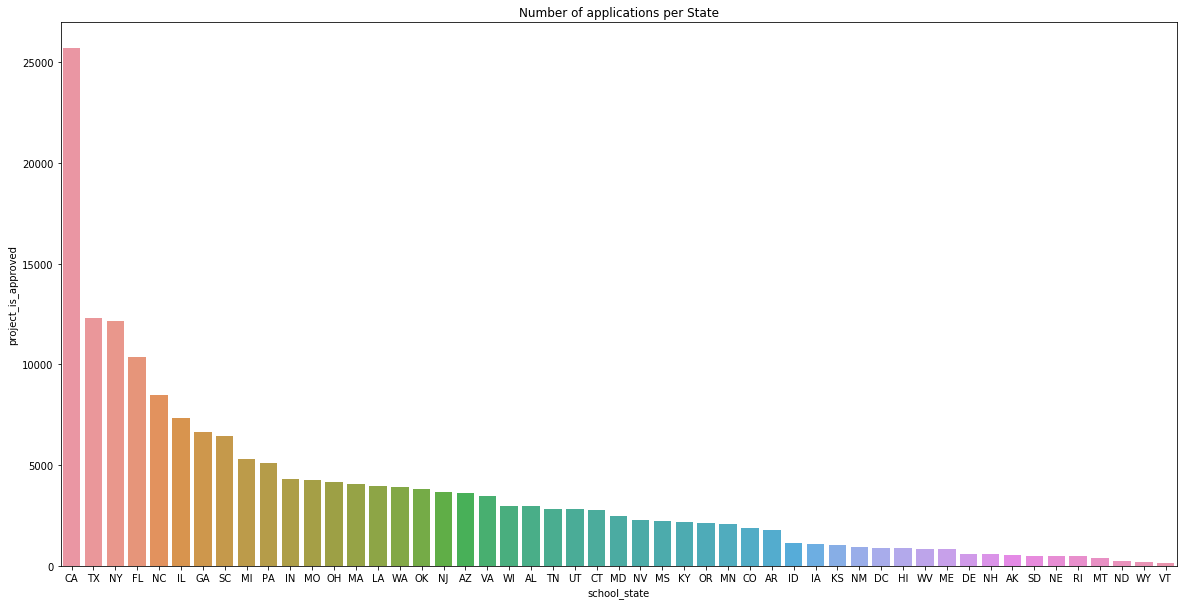

In [28]:
stateAceptance = train[["school_state","project_is_approved"]].groupby("school_state").count()
stateAceptance["state"] = stateAceptance.index
stateAceptance = stateAceptance.sort_values( "project_is_approved", ascending=False)

fig = plt.figure( figsize=(20,10))
plt.title("Number of applications per State")
sns.barplot(x = stateAceptance.index, y =stateAceptance.project_is_approved )

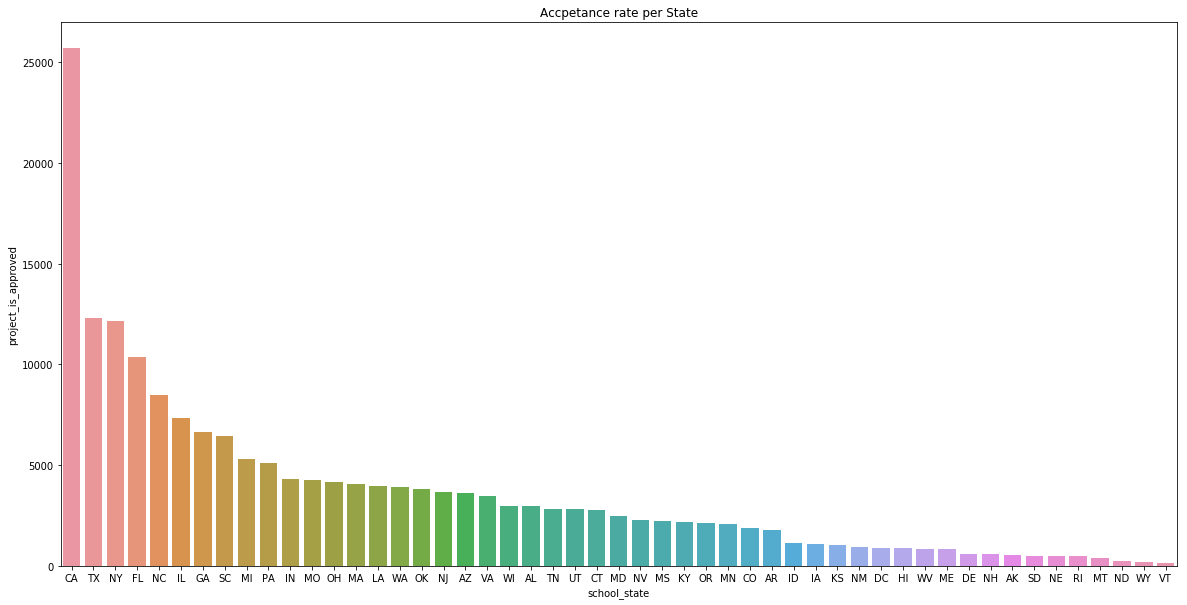

In [29]:
stateAcceptance = train[["school_state","project_is_approved"]].groupby("school_state").mean()
stateAcceptance["state"] = stateAcceptance.index

fig = plt.figure( figsize=(20,10))
plt.title("Accpetance rate per State")
sns.barplot(x = stateAceptance.index, y =stateAceptance.project_is_approved )

Lets find out relationship between project categories and proposals accepted. 

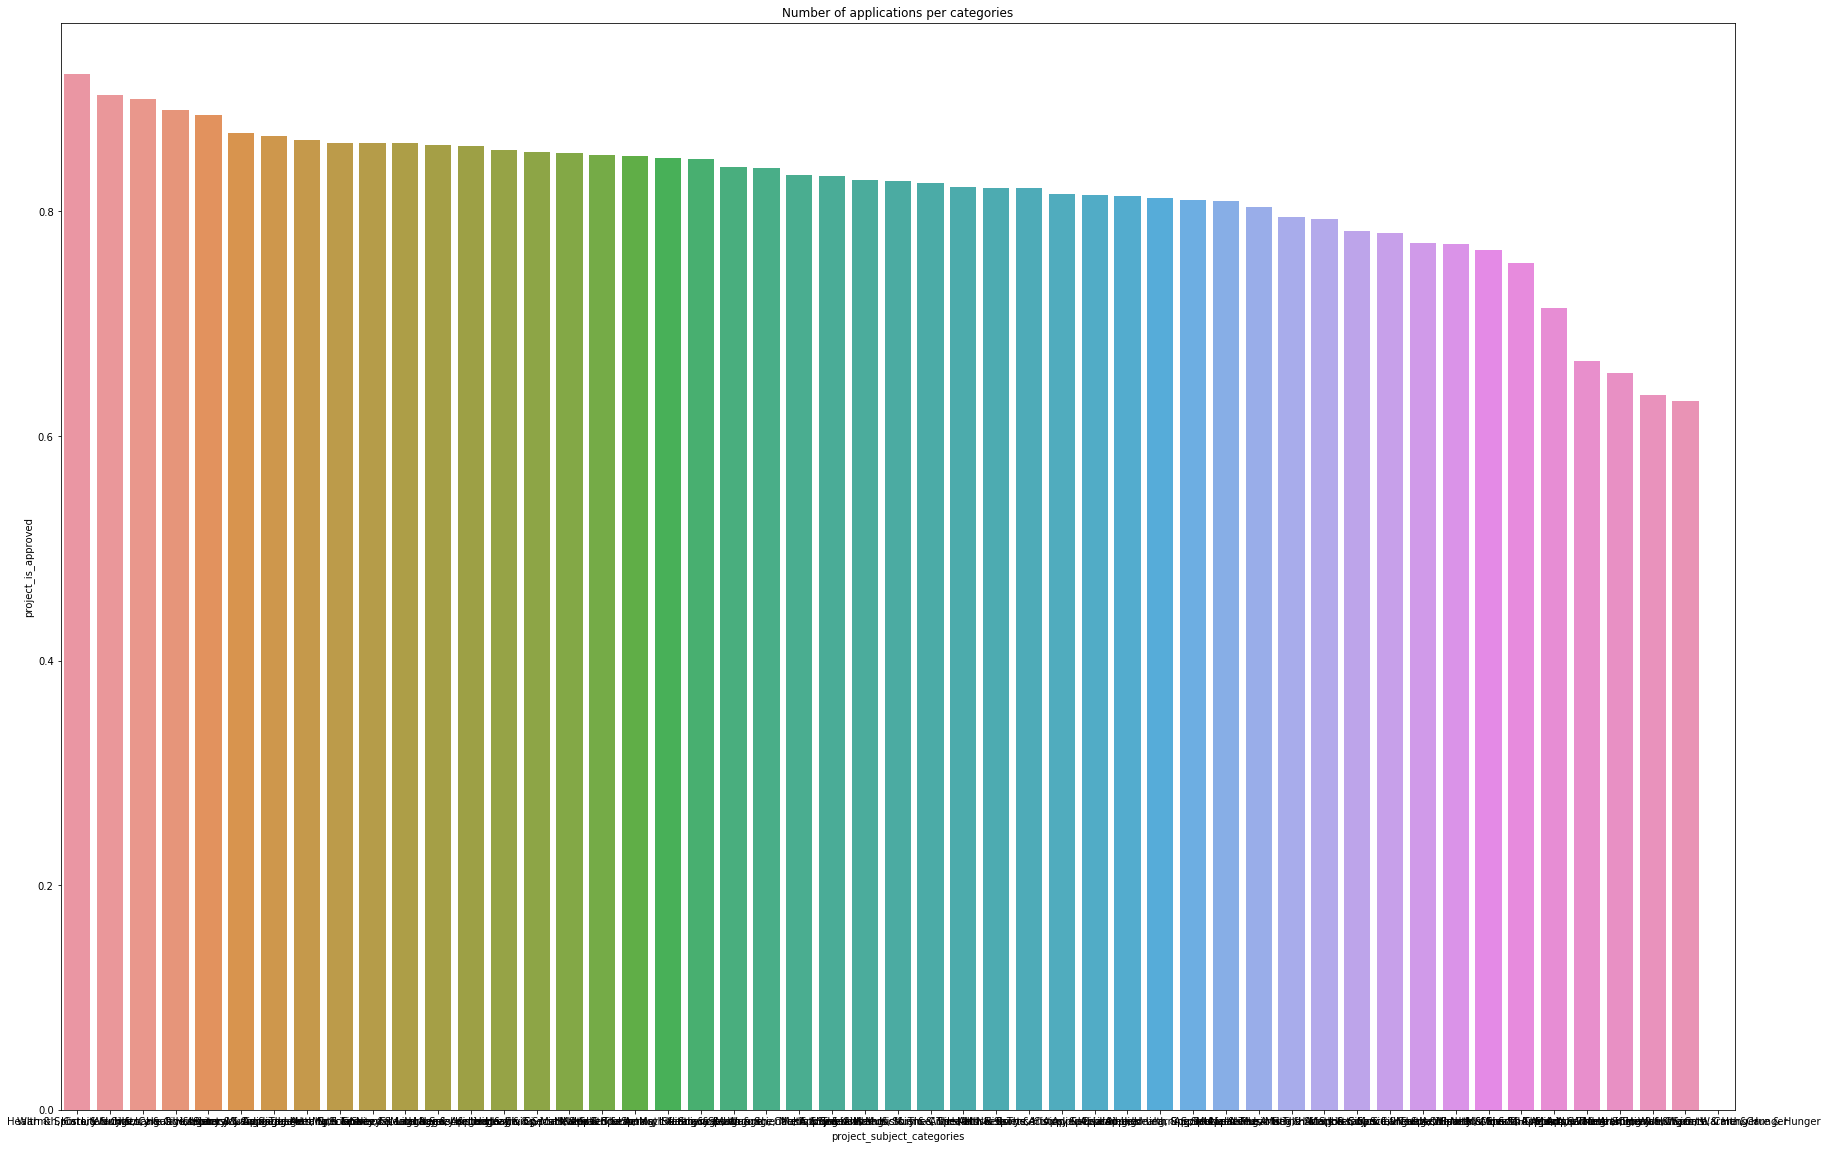

In [30]:
projCategoryAcceptance = train[["project_subject_categories","project_is_approved"]].groupby("project_subject_categories").mean()
projCategoryAcceptance["project_subject_categories"] = projCategoryAcceptance.index
projCategoryAcceptance = projCategoryAcceptance.sort_values( "project_is_approved", ascending=False)

fig = plt.figure( figsize=(30,20))
plt.title("Number of applications per categories")
sns.barplot(x = projCategoryAcceptance.index, y =projCategoryAcceptance.project_is_approved )

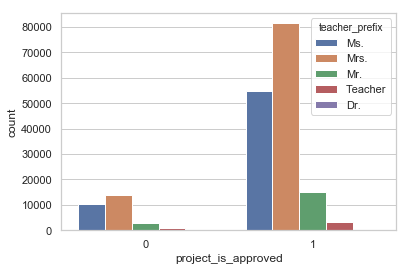

In [31]:
plt.figure()
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x = "project_is_approved", hue = "teacher_prefix",
               data = df)

From the above plot it is visible that people with prefix as "Mrs" have more projects approved compared to people with other prefixes. This could contribute to prediction of the target variable - project_is_approved.

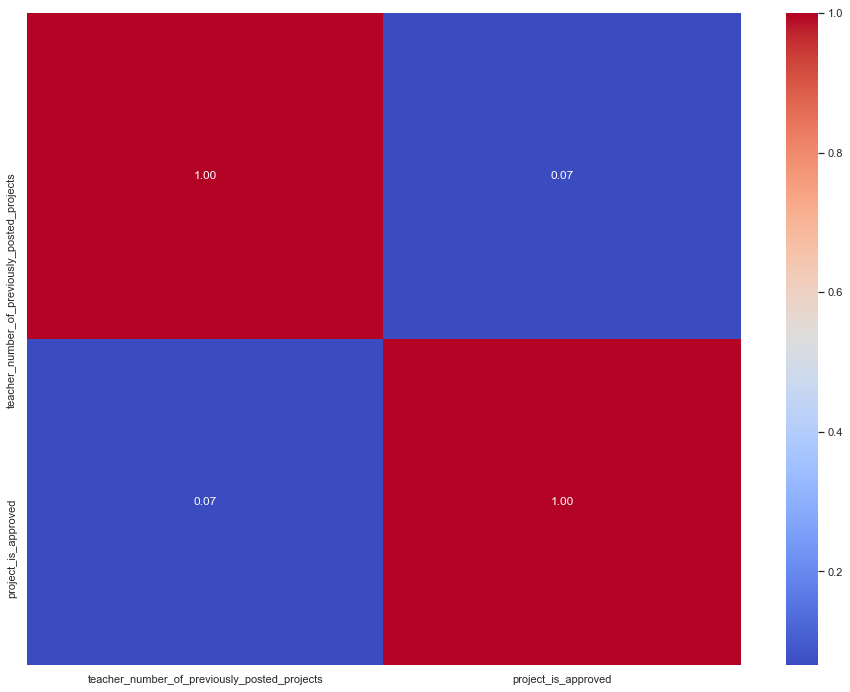

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

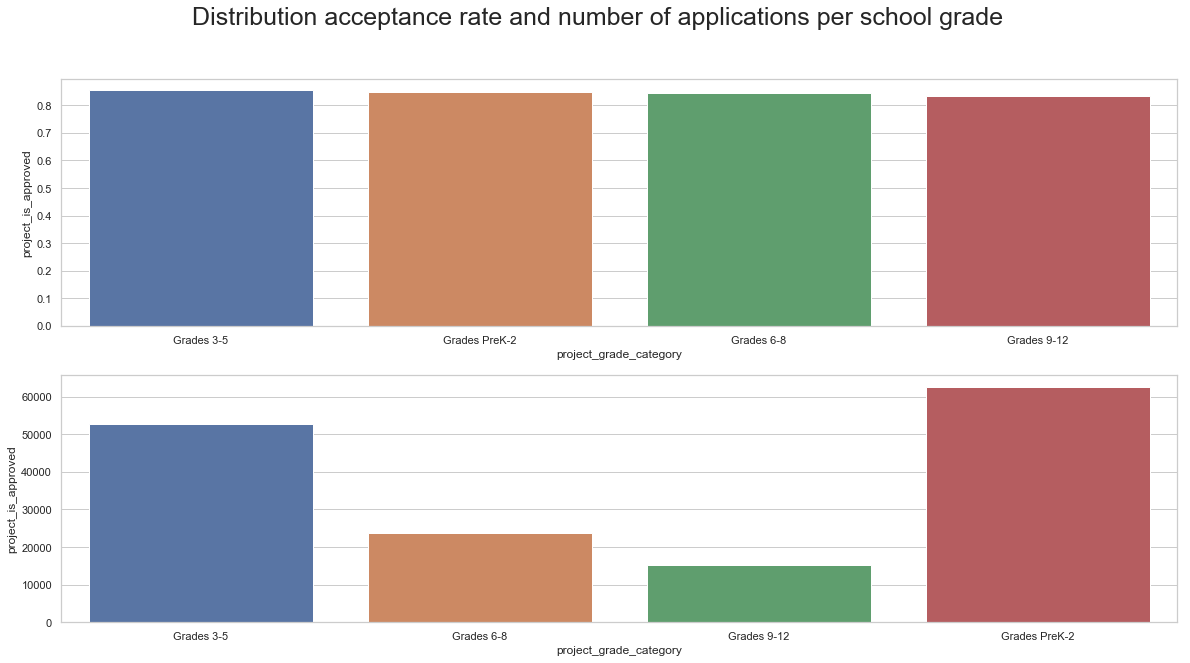

In [33]:
categoryAcceptance = train[["project_grade_category","project_is_approved"]].groupby("project_grade_category").mean()
categoryAcceptance = categoryAcceptance.sort_values( "project_is_approved", ascending=False)

fig = plt.figure( figsize=(20,10))
fig.suptitle( "Distribution acceptance rate and number of applications per school grade ", fontsize = 25)
plt.subplot(2,1,1)
sns.barplot(x = categoryAcceptance.index, y =categoryAcceptance.project_is_approved )

categoryAcceptance = train[["project_grade_category","project_is_approved"]].groupby("project_grade_category").sum()

plt.subplot(2,1,2)
sns.barplot(x = categoryAcceptance.index, y =categoryAcceptance.project_is_approved )

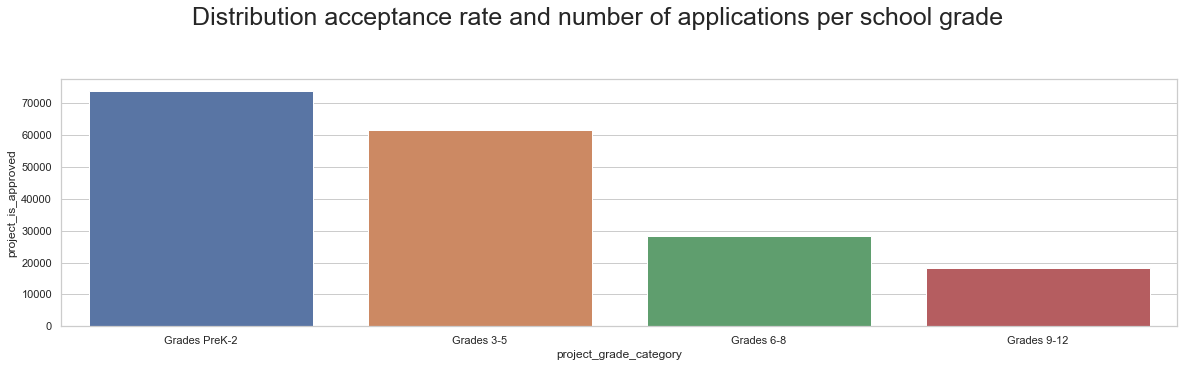

In [34]:
categoryAceptance = train[["project_grade_category","project_is_approved"]].groupby("project_grade_category").count()
categoryAceptance = categoryAceptance.sort_values( "project_is_approved", ascending=False)

fig = plt.figure( figsize=(20,10))
fig.suptitle( "Distribution acceptance rate and number of applications per school grade ", fontsize = 25)
plt.subplot(2,1,1)
sns.barplot(x = categoryAceptance.index, y =categoryAceptance.project_is_approved )



We need to find relationship between gender and proposal accepted.

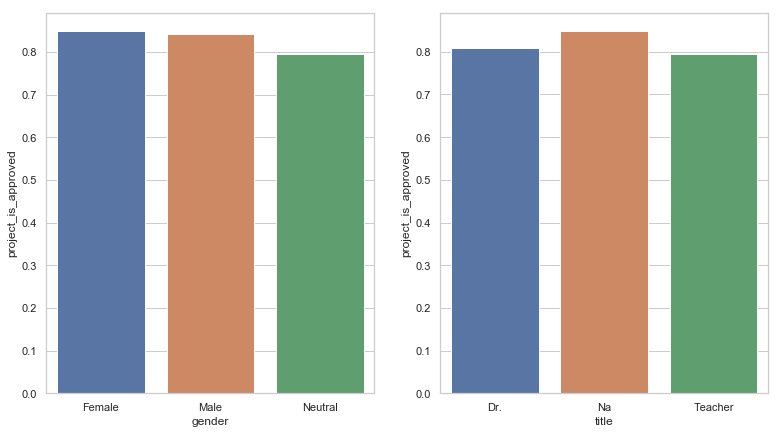

In [35]:
gender = {"Ms.": "Female", "Mrs.":"Female", "Mr.":"Male", "Teacher":"Neutral", "Dr.":"Neutral", np.nan:"Neutral"  }
train["gender"] = train.teacher_prefix.map( gender )
genderAceptance = train[["gender","project_is_approved"]].groupby("gender").mean()

title = {"Ms.": "Na", "Mrs.":"Na", "Mr.":"Na", "Teacher":"Teacher", "Dr.":"Dr.", np.nan:"Na"  }
train["title"] = train.teacher_prefix.map( title )
titleAceptance = train[["title","project_is_approved"]].groupby("title").mean()

fig  = plt.figure(figsize=(20,7))
ax1 = plt.subplot(1,3,1)
sns.barplot(x = genderAceptance.index, y =genderAceptance.project_is_approved )
ax2 = plt.subplot(1,3,2)
sns.barplot(x = titleAceptance.index, y =titleAceptance.project_is_approved )

### Building different models and evaluating them 

### Logistic Regression

Logistic Regression is a regression analysis method by which we can explain and justify relationship between target categorical variable and one or more independent variables.Usually categorical variable considered to be binary. 

In [36]:
#importing data frame
train_df=pd.read_csv("train.csv", sep=',', date_parser='project_submitted_time')
test_df = pd.read_csv("test.csv", sep=',', date_parser='project_submitted_time')

In [37]:
#Join the duplicate rows in resources CSV and get the sum of quantity and price
train_resource_merged = resources.groupby(['id'], as_index=False)[['quantity','price']].sum()
test_resource_merged = resources.groupby(['id'], as_index=False)[['quantity','price']].sum()

In [38]:
#Join the train and test resources to respective dataframes
train_joined = pd.merge(train,train_resource_merged,on='id')
test_joined = pd.merge(test,test_resource_merged,on='id')


In [39]:
df = train_joined

In [40]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,gender,title,quantity,price
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,Female,Na,6,299.98
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,Female,Na,20,20.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,Female,Na,1,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,Male,Na,5,684.47
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,Male,Na,2,355.50


In [41]:
#Remove unwanted columns
columns_to_remove = ["id","project_essay_1","project_essay_2","project_essay_3","project_essay_4","project_submitted_datetime","project_title","project_resource_summary"]
train_joined.drop(columns_to_remove,inplace=True,axis=1)
test_joined.drop(columns_to_remove,inplace=True,axis=1)

In [42]:
df.head()

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,gender,title,quantity,price
0,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,Grades PreK-2,Literacy & Language,Literacy,26,1,Female,Na,6,299.98
1,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",1,0,Female,Na,20,20.00
2,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",5,1,Female,Na,1,469.99
3,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,Grades 3-5,Health & Sports,Health & Wellness,16,0,Male,Na,5,684.47
4,a63b5547a7239eae4c1872670848e61a,Mr.,CA,Grades 6-8,Health & Sports,Health & Wellness,42,1,Male,Na,2,355.50


In [43]:
df.teacher_prefix.dtypes

dtype('O')

### Performing categorical columns encoding

Inorder to proceed ahead with model building, we need to first convert categorical columns into readable format so that regression models can be performed easily. 

In [44]:
df['teacher_prefix'] = pd.DataFrame(df['teacher_prefix'])
df['teacher_prefix']=df['teacher_prefix'].astype("category").cat.codes
df['teacher_prefix'].head(10)

0    3
1    2
2    3
3    1
4    1
5    2
6    2
7    2
8    3
9    2
Name: teacher_prefix, dtype: int8

In [45]:
#one hot encode
grade={"project_grade_category":{"Grades PreK-2":1,"Grades 3-5":2,"Grades 6-8":3,"Grades 9-12":4}}
df.replace(grade, inplace=True)
df.head(10)

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,gender,title,quantity,price
0,484aaf11257089a66cfedc9461c6bd0a,3,NV,1,Literacy & Language,Literacy,26,1,Female,Na,6,299.98
1,df72a3ba8089423fa8a94be88060f6ed,2,GA,2,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",1,0,Female,Na,20,20.00
2,a9b876a9252e08a55e3d894150f75ba3,3,UT,2,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",5,1,Female,Na,1,469.99
3,525fdbb6ec7f538a48beebaa0a51b24f,1,NC,2,Health & Sports,Health & Wellness,16,0,Male,Na,5,684.47
4,a63b5547a7239eae4c1872670848e61a,1,CA,3,Health & Sports,Health & Wellness,42,1,Male,Na,2,355.50
5,403c6783e9286e51ab318fba40f8d729,2,DE,1,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",0,1,Female,Na,7,207.82
6,4e156c5fb3eea2531601c8736f3751a7,2,MO,1,Health & Sports,Health & Wellness,1,1,Female,Na,6,111.00
7,c71f2ef13b4bc91afac61ca8fd4c0f9f,2,SC,1,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",0,1,Female,Na,6,69.13
8,b580c11b1497a0a67317763b7f03eb27,3,IN,3,Math & Science,Mathematics,13,1,Female,Na,4,79.95
9,2071fb0af994f8f16e7c6ed0f35062a1,2,IL,1,Literacy & Language,Literacy,12,1,Female,Na,2,59.88


In [46]:
df.project_grade_category

0         1
1         2
2         2
3         2
4         3
5         1
6         1
7         1
8         3
9         1
10        1
11        1
12        2
13        2
14        1
15        2
16        1
17        1
18        1
19        1
20        3
21        1
22        1
23        1
24        1
25        3
26        1
27        2
28        4
29        1
         ..
182050    2
182051    1
182052    1
182053    3
182054    1
182055    3
182056    4
182057    2
182058    1
182059    3
182060    1
182061    1
182062    1
182063    2
182064    2
182065    2
182066    1
182067    2
182068    1
182069    1
182070    3
182071    1
182072    1
182073    1
182074    3
182075    3
182076    4
182077    3
182078    1
182079    2
Name: project_grade_category, Length: 182080, dtype: int64

In [47]:
#one hot encode
gender ={"gender":{"Male":1,"Female":2,"Neutral":3, np.nan:4}}
df.replace(gender, inplace=True)
df.head(10)

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,gender,title,quantity,price
0,484aaf11257089a66cfedc9461c6bd0a,3,NV,1,Literacy & Language,Literacy,26,1,2,Na,6,299.98
1,df72a3ba8089423fa8a94be88060f6ed,2,GA,2,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",1,0,2,Na,20,20.00
2,a9b876a9252e08a55e3d894150f75ba3,3,UT,2,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",5,1,2,Na,1,469.99
3,525fdbb6ec7f538a48beebaa0a51b24f,1,NC,2,Health & Sports,Health & Wellness,16,0,1,Na,5,684.47
4,a63b5547a7239eae4c1872670848e61a,1,CA,3,Health & Sports,Health & Wellness,42,1,1,Na,2,355.50
5,403c6783e9286e51ab318fba40f8d729,2,DE,1,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",0,1,2,Na,7,207.82
6,4e156c5fb3eea2531601c8736f3751a7,2,MO,1,Health & Sports,Health & Wellness,1,1,2,Na,6,111.00
7,c71f2ef13b4bc91afac61ca8fd4c0f9f,2,SC,1,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",0,1,2,Na,6,69.13
8,b580c11b1497a0a67317763b7f03eb27,3,IN,3,Math & Science,Mathematics,13,1,2,Na,4,79.95
9,2071fb0af994f8f16e7c6ed0f35062a1,2,IL,1,Literacy & Language,Literacy,12,1,2,Na,2,59.88


In [48]:
df['project_subject_categories'] = pd.DataFrame(df['project_subject_categories'])
df['project_subject_categories']=df['project_subject_categories'].astype("category").cat.codes
df['project_subject_categories'].head(10)

0    24
1    42
2    36
3     8
4     8
5     3
6     8
7     3
8    32
9    24
Name: project_subject_categories, dtype: int8

In [49]:
df['school_state'] = pd.DataFrame(df['school_state'])
df['school_state']=df['school_state'].astype("category").cat.codes
df['school_state'].head(10)

0    33
1    10
2    44
3    27
4     4
5     8
6    24
7    40
8    15
9    14
Name: school_state, dtype: int8

In [50]:
df['project_subject_subcategories'] = pd.DataFrame(df['project_subject_subcategories'])
df['project_subject_subcategories']=df['project_subject_categories'].astype("category").cat.codes
df['project_subject_subcategories'].head(10)

0    24
1    42
2    36
3     8
4     8
5     3
6     8
7     3
8    32
9    24
Name: project_subject_subcategories, dtype: int8

In [51]:
df.head(10)

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,gender,title,quantity,price
0,484aaf11257089a66cfedc9461c6bd0a,3,33,1,24,24,26,1,2,Na,6,299.98
1,df72a3ba8089423fa8a94be88060f6ed,2,10,2,42,42,1,0,2,Na,20,20.00
2,a9b876a9252e08a55e3d894150f75ba3,3,44,2,36,36,5,1,2,Na,1,469.99
3,525fdbb6ec7f538a48beebaa0a51b24f,1,27,2,8,8,16,0,1,Na,5,684.47
4,a63b5547a7239eae4c1872670848e61a,1,4,3,8,8,42,1,1,Na,2,355.50
5,403c6783e9286e51ab318fba40f8d729,2,8,1,3,3,0,1,2,Na,7,207.82
6,4e156c5fb3eea2531601c8736f3751a7,2,24,1,8,8,1,1,2,Na,6,111.00
7,c71f2ef13b4bc91afac61ca8fd4c0f9f,2,40,1,3,3,0,1,2,Na,6,69.13
8,b580c11b1497a0a67317763b7f03eb27,3,15,3,32,32,13,1,2,Na,4,79.95
9,2071fb0af994f8f16e7c6ed0f35062a1,2,14,1,24,24,12,1,2,Na,2,59.88


In [52]:
df['teacher_id'] = pd.DataFrame(df['teacher_id'])
df['teacher_id']=df['teacher_id'].astype("category").cat.codes
df['teacher_id'].head(10)

0    29315
1    91061
2    69247
3    33451
4    67811
5    25993
6    31702
7    81048
8    73923
9    13146
Name: teacher_id, dtype: int32

In [53]:
df.corr()

,teacher_id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,gender,quantity,price
teacher_id,1.000000,0.001695,0.004821,0.007140,0.006827,0.006827,-0.000565,-0.002250,0.000406,0.003038,0.002516
teacher_prefix,0.001695,1.000000,0.004967,-0.121644,0.013463,0.013463,-0.022445,-0.014121,0.721105,0.025532,-0.023641
school_state,0.004821,0.004967,1.000000,-0.028097,-0.001930,-0.001930,-0.023936,-0.001494,0.026733,-0.002747,-0.019231
project_grade_category,0.007140,-0.121644,-0.028097,1.000000,0.050661,0.050661,-0.034053,-0.008323,-0.234543,0.121161,0.014063
project_subject_categories,0.006827,0.013463,-0.001930,0.050661,1.000000,1.000000,-0.002837,0.002292,0.003344,0.000453,0.025387
project_subject_subcategories,0.006827,0.013463,-0.001930,0.050661,1.000000,1.000000,-0.002837,0.002292,0.003344,0.000453,0.025387
teacher_number_of_previously_posted_projects,-0.000565,-0.022445,-0.023936,-0.034053,-0.002837,-0.002837,1.000000,0.065579,-0.033855,0.006949,-0.005064
project_is_approved,-0.002250,-0.014121,-0.001494,-0.008323,0.002292,0.002292,0.065579,1.000000,-0.004982,-0.053147,-0.069199
gender,0.000406,0.721105,0.026733,-0.234543,0.003344,0.003344,-0.033855,-0.004982,1.000000,0.000385,-0.052828
quantity,0.003038,0.025532,-0.002747,0.121161,0.000453,0.000453,0.006949,-0.053147,0.000385,1.000000,-0.082186


In [54]:
df.drop('title', inplace=True, axis = 1)

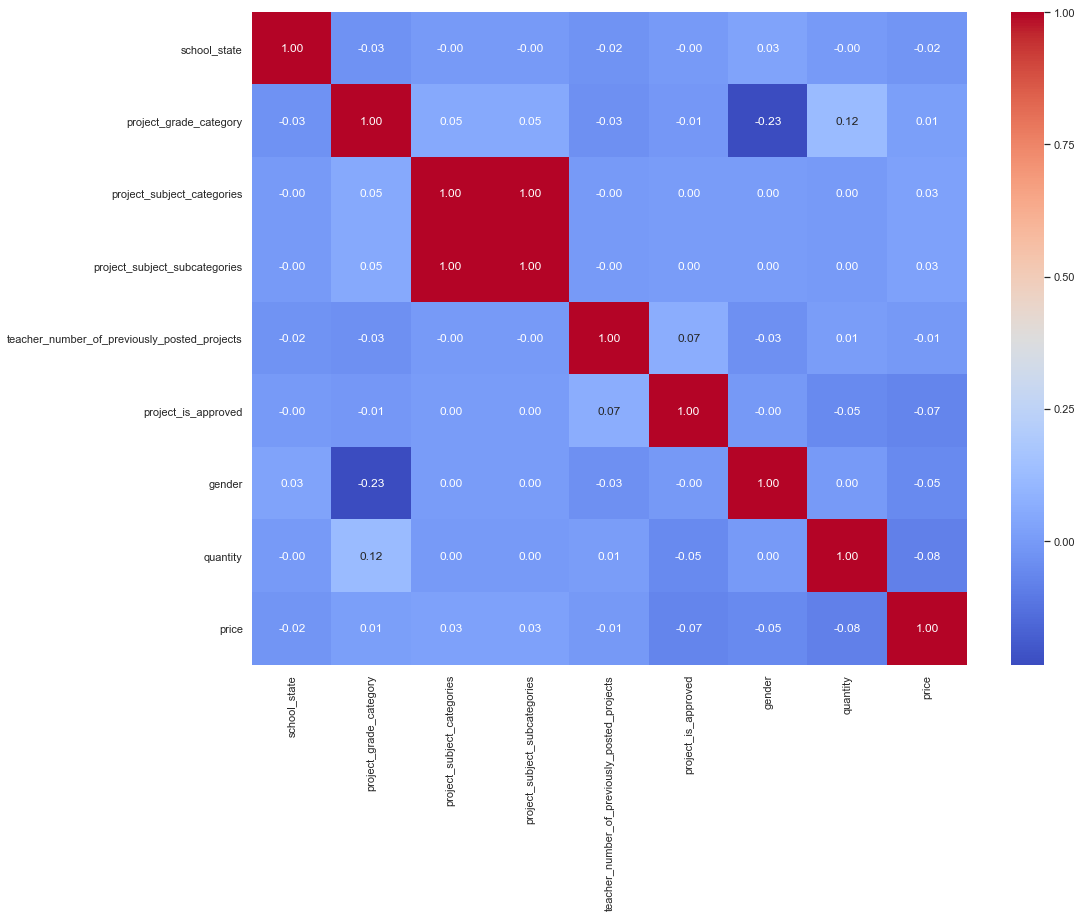

In [55]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

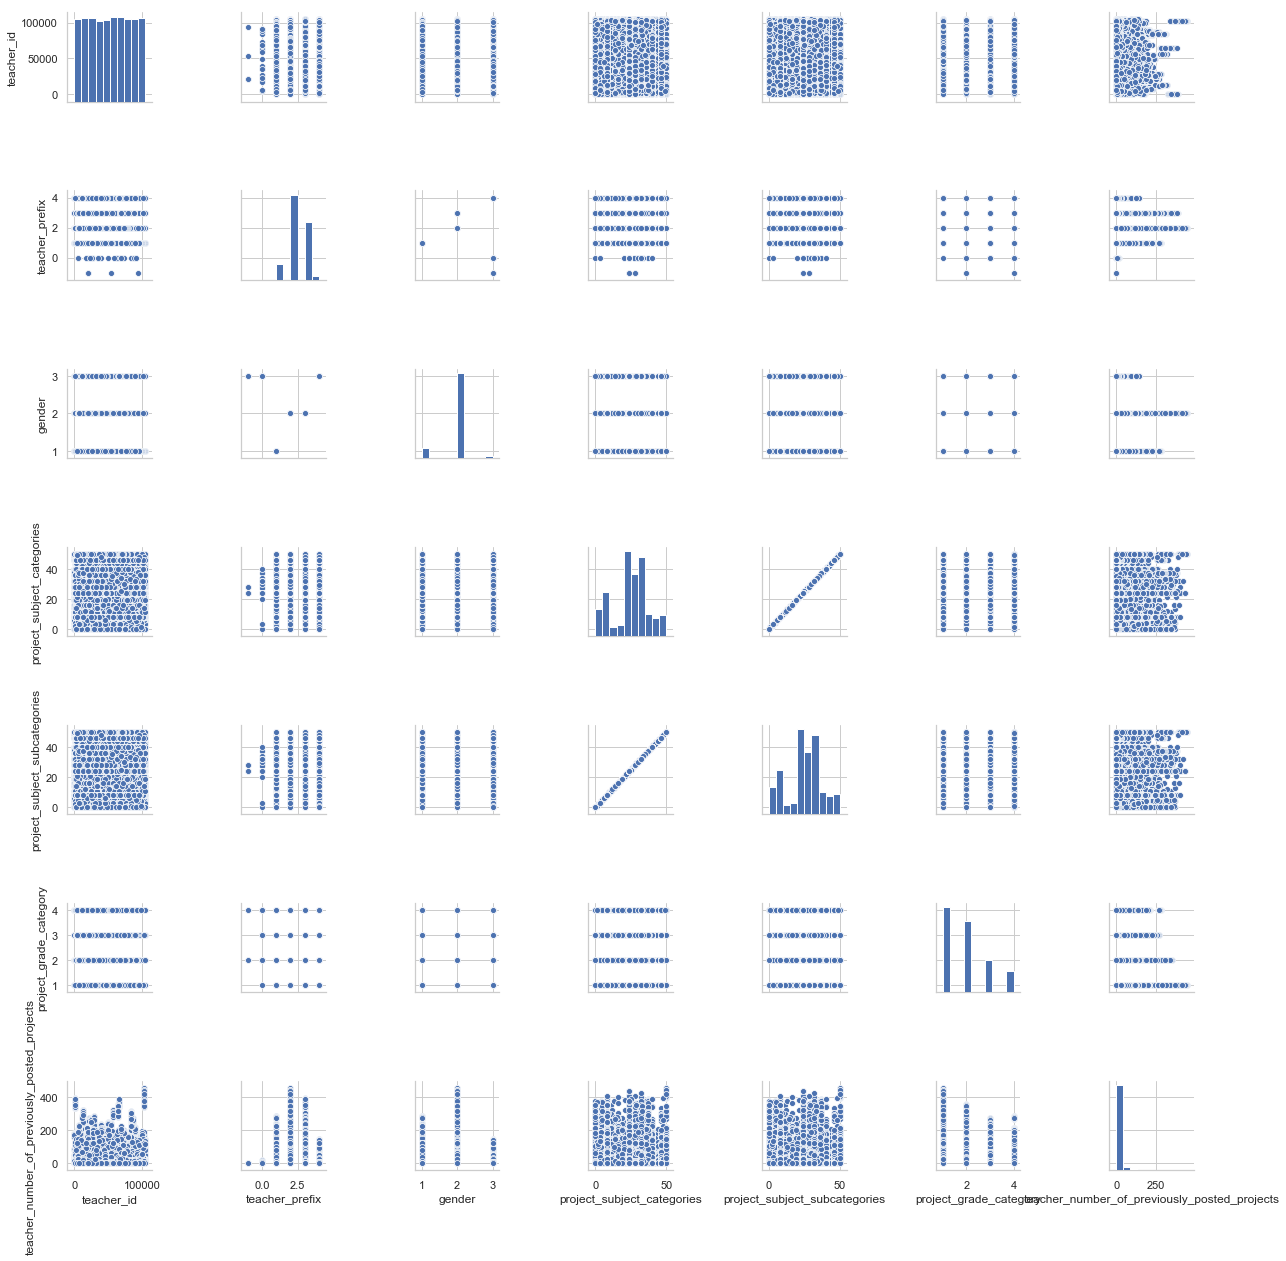

In [56]:
x = df[['teacher_id'
,'teacher_prefix'
,'gender'
,'project_subject_categories'
,'project_subject_subcategories'
,'project_grade_category'
,'teacher_number_of_previously_posted_projects'
]]
sns.pairplot(x)

In [57]:
cols_to_use = ['teacher_prefix',
               'school_state',
               'project_grade_category',
               'project_subject_categories', 
               'project_subject_subcategories']
y_cols_to_use = ['project_is_approved']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(145664, 5) (145664, 1)
(36416, 5) (36416, 1)


In [58]:
df.teacher_prefix

0         3
1         2
2         3
3         1
4         1
5         2
6         2
7         2
8         3
9         2
10        4
11        2
12        3
13        2
14        3
15        2
16        1
17        2
18        2
19        2
20        2
21        2
22        3
23        1
24        2
25        2
26        2
27        3
28        1
29        2
         ..
182050    3
182051    2
182052    3
182053    2
182054    3
182055    3
182056    1
182057    2
182058    2
182059    1
182060    2
182061    3
182062    3
182063    2
182064    2
182065    2
182066    2
182067    2
182068    2
182069    2
182070    3
182071    3
182072    2
182073    1
182074    2
182075    1
182076    1
182077    2
182078    2
182079    3
Name: teacher_prefix, Length: 182080, dtype: int8

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
df.school_state

0         33
1         10
2         44
3         27
4          4
5          8
6         24
7         40
8         15
9         14
10        45
11         4
12        38
13        34
14         9
15        31
16        43
17        15
18         9
19        18
20        38
21        34
22        27
23        43
24        38
25        27
26        31
27        44
28        13
29        35
          ..
182050    43
182051    35
182052    27
182053     9
182054     9
182055    48
182056    31
182057     9
182058     9
182059     4
182060    43
182061    47
182062     4
182063    44
182064     6
182065    43
182066    16
182067    27
182068    14
182069    43
182070    36
182071    42
182072    43
182073    43
182074     4
182075    32
182076     3
182077     3
182078     9
182079    43
Name: school_state, Length: 182080, dtype: int8

In [61]:
prob=clf.predict_proba(X_test)
prob

array([[0.14792881, 0.85207119],
       [0.14940503, 0.85059497],
       [0.15261098, 0.84738902],
       ...,
       [0.150949  , 0.849051  ],
       [0.14726848, 0.85273152],
       [0.15546052, 0.84453948]])

In [62]:
accuracy=clf.score(X_test, y_test)
accuracy

0.8478690685413005

In [63]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model1 = smf.Logit(df['project_is_approved'],x).fit()
    print(model1.summary())

In [64]:
logisticModel(df['teacher_prefix'])
logisticModel(df['school_state'])
logisticModel(df['project_grade_category'])
logisticModel(df['project_subject_categories'])
logisticModel(df['project_subject_subcategories'])

Optimization terminated successfully.
         Current function value: 0.445173
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     project_is_approved   No. Observations:               182080
Model:                           Logit   Df Residuals:                   182079
Method:                            MLE   Df Model:                            0
Date:                 Wed, 03 Apr 2019   Pseudo R-squ.:                -0.04327
Time:                         22:43:16   Log-Likelihood:                -81057.
converged:                        True   LL-Null:                       -77695.
                                         LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
teacher_prefix     0.7106      0.003    248.664      0.000       0.705       0.716
Optimizat

In [65]:
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [66]:
# 10-fold cross-validation with all three features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)


[2.71238034e-04 3.43367650e-04 9.87318382e-05 1.88320324e-04
 2.60221059e-04]


In [67]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(['teacher_prefix','school_state','project_grade_category','project_subject_categories','project_subject_subcategories'], axis=1), dtype=pd.Series)
    Y = np.array(newdf['project_is_approved'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [74]:
cross_validation(df)



2.1750723199141086e-14

### Finding AUC and ROC curves for the model 

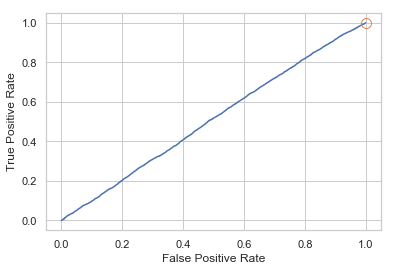

0.5108743492661691

In [105]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as sk

falsepos,truepos,thresholds=roc_curve(y_test,predictions)

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

from sklearn import metrics
metrics.auc(falsepos, truepos)

In [ ]:
df.head(10)

Model - 2 

In [ ]:
cols_to_use = ['teacher_id','teacher_prefix','gender','school_state','project_grade_category','project_subject_categories','project_subject_subcategories','teacher_number_of_previously_posted_projects']
y_cols_to_use = ['project_is_approved']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
prediction=clf.predict(X_test)

In [ ]:
prob=clf.predict_proba(X_test)
prob

In [ ]:
accuracy=clf.score(X_test, y_test)
accuracy

In [ ]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model2 = smf.Logit(df['project_is_approved'],x).fit()
    print(model2.summary())

In [ ]:
logisticModel(df['teacher_id'])
logisticModel(df['teacher_prefix'])
logisticModel(df['gender'])
logisticModel(df['school_state'])
logisticModel(df['project_grade_category'])
logisticModel(df['project_subject_categories'])
logisticModel(df['project_subject_subcategories'])
logisticModel(df['teacher_number_of_previously_posted_projects'])

In [ ]:
def cross_validation(x):
    df=x
    X = np.array(df.drop(['teacher_id','teacher_prefix','school_state','project_grade_category','project_subject_categories','project_subject_subcategories'],axis=1), dtype=pd.Series)
    Y = np.array(df['project_is_approved'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(log_model, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse


def cross_validation(x):
    newdf=x
    X = np.array(df.drop(['teacher_id','teacher_prefix','school_state','project_grade_category','project_subject_categories','project_subject_subcategories'],axis=1), dtype=pd.Series)
    #X = np.array(newdf.drop(['teacher_prefix','school_state','project_grade_category','project_subject_categories','project_subject_subcategories'], axis=1), dtype=pd.Series)
    Y = np.array(newdf['project_is_approved'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [ ]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.info()

In [ ]:
cross_validation(df)

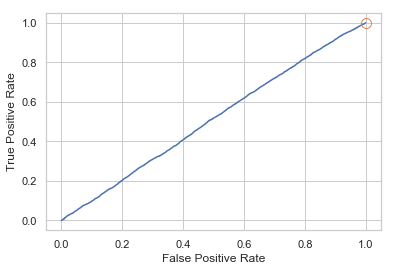

0.5108743492661691

In [106]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as sk

falsepos,truepos,thresholds=roc_curve(y_test,predictions)

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

from sklearn import metrics
metrics.auc(falsepos, truepos)

### Random Forest Model 



In [108]:
# Feature Engineering
train_df = pd.DataFrame()
train_df['id'] = train['id']
train_df['project_is_approved'] = train['project_is_approved']
for title in np.unique(train["teacher_prefix"].tolist()):
    train_df['teacher_prefix_{0}'.format(title)] = train['teacher_prefix'].apply(lambda x: 1 if title == x else 0)
#train_df['is_teacher_prefix_Dr'] = train['teacher_prefix'].apply(lambda x: 1 if 'Dr.' == x else 0)
#train_df['is_teacher_prefix_Normal'] = train['teacher_prefix'].apply(lambda x: 1 if x in ('Mrs.','Ms.','Mr.') else 0)
#train_df['is_teacher_prefix_Other'] = train['teacher_prefix'].apply(lambda x: 0 if x in ('Dr.','Mrs.','Ms.','Mr.') else 1)
for state in np.unique(train["school_state"].tolist()):
    train_df['school_state_{0}'.format(state)] = train['school_state'].apply(lambda x: 1 if state == x else 0)
for grade in np.unique(train["project_grade_category"].tolist()):
    train_df['project_grade_category_{0}'.format(grade)] = train['project_grade_category'].apply(lambda x: 1 if grade == x else 0)
categories = ['Applied Learning', 'Math & Science', 'Music & The Arts', 'History & Civics', 'Warmth, Care & Hunger', 'Literacy & Language','Special Needs']
for category in categories:
    train_df['project_subject_categories_{0}'.format(category)] = train['project_subject_categories'].apply(lambda x: 1 if category in x else 0)
train_df['teacher_number_of_previously_posted_projects'] = train['teacher_number_of_previously_posted_projects']
train_df.columns

Index(['id', 'project_is_approved', 'teacher_prefix_Dr.', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'teacher_prefix_Teacher',
       'teacher_prefix_nan', 'school_state_AK', 'school_state_AL',
       'school_state_AR', 'school_state_AZ', 'school_state_CA',
       'school_state_CO', 'school_state_CT', 'school_state_DC',
       'school_state_DE', 'school_state_FL', 'school_state_GA',
       'school_state_HI', 'school_state_IA', 'school_state_ID',
       'school_state_IL', 'school_state_IN', 'school_state_KS',
       'school_state_KY', 'school_state_LA', 'school_state_MA',
       'school_state_MD', 'school_state_ME', 'school_state_MI',
       'school_state_MN', 'school_state_MO', 'school_state_MS',
       'school_state_MT', 'school_state_NC', 'school_state_ND',
       'school_state_NE', 'school_state_NH', 'school_state_NJ',
       'school_state_NM', 'school_state_NV', 'school_state_NY',
       'school_state_OH', 'school_state_OK', 'school_state_OR',
       

In [109]:
# Incorporate resources for prices and quantity
train_resources = train_df.set_index('id').join(resources.set_index('id'))
price_quantity = train_resources.groupby(['id'])[["price", "quantity"]].sum()
price_quantity['total'] = price_quantity["price"] * price_quantity["quantity"]
X = train_df.set_index('id').join(price_quantity)
y = X['project_is_approved']
# remove unneccesary columns
X.drop(['project_is_approved','price','quantity'], axis=1, inplace=True)
X.columns

Index(['teacher_prefix_Dr.', 'teacher_prefix_Mr.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_Teacher', 'teacher_prefix_nan',
       'school_state_AK', 'school_state_AL', 'school_state_AR',
       'school_state_AZ', 'school_state_CA', 'school_state_CO',
       'school_state_CT', 'school_state_DC', 'school_state_DE',
       'school_state_FL', 'school_state_GA', 'school_state_HI',
       'school_state_IA', 'school_state_ID', 'school_state_IL',
       'school_state_IN', 'school_state_KS', 'school_state_KY',
       'school_state_LA', 'school_state_MA', 'school_state_MD',
       'school_state_ME', 'school_state_MI', 'school_state_MN',
       'school_state_MO', 'school_state_MS', 'school_state_MT',
       'school_state_NC', 'school_state_ND', 'school_state_NE',
       'school_state_NH', 'school_state_NJ', 'school_state_NM',
       'school_state_NV', 'school_state_NY', 'school_state_OH',
       'school_state_OK', 'school_state_OR', 'school_state_PA',
       'school_st

In [110]:
# Load test dataset
test = pd.read_csv('test.csv')
test.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects'],
      dtype='object')

In [111]:
# Reformat test dataset
test_df = pd.DataFrame()
test_df['id'] = test['id']
for title in np.unique(train["teacher_prefix"].tolist()):
    test_df['teacher_prefix_{0}'.format(title)] = test['teacher_prefix'].apply(lambda x: 1 if title == x else 0)
#test_df['is_teacher_prefix_Dr'] = test['teacher_prefix'].apply(lambda x: 1 if 'Dr.' == x else 0)
#test_df['is_teacher_prefix_Normal'] = test['teacher_prefix'].apply(lambda x: 1 if x in ('Mrs.','Ms.','Mr.') else 0)
#test_df['is_teacher_prefix_Other'] = test['teacher_prefix'].apply(lambda x: 0 if x in ('Dr.','Mrs.','Ms.','Mr.') else 1)
for state in np.unique(train["school_state"].tolist()):
    test_df['school_state_{0}'.format(state)] = test['school_state'].apply(lambda x: 1 if state == x else 0)
for grade in np.unique(test["project_grade_category"].tolist()):
    test_df['project_grade_category_{0}'.format(grade)] = test['project_grade_category'].apply(lambda x: 1 if grade == x else 0)
categories = ['Applied Learning', 'Math & Science', 'Music & The Arts', 'History & Civics', 'Warmth, Care & Hunger', 'Literacy & Language','Special Needs']
for category in categories:
    test_df['project_subject_categories_{0}'.format(category)] = test['project_subject_categories'].apply(lambda x: 1 if category in x else 0)
test_df['teacher_number_of_previously_posted_projects'] = test['teacher_number_of_previously_posted_projects']
test_df.columns

Index(['id', 'teacher_prefix_Dr.', 'teacher_prefix_Mr.', 'teacher_prefix_Mrs.',
       'teacher_prefix_Ms.', 'teacher_prefix_Teacher', 'teacher_prefix_nan',
       'school_state_AK', 'school_state_AL', 'school_state_AR',
       'school_state_AZ', 'school_state_CA', 'school_state_CO',
       'school_state_CT', 'school_state_DC', 'school_state_DE',
       'school_state_FL', 'school_state_GA', 'school_state_HI',
       'school_state_IA', 'school_state_ID', 'school_state_IL',
       'school_state_IN', 'school_state_KS', 'school_state_KY',
       'school_state_LA', 'school_state_MA', 'school_state_MD',
       'school_state_ME', 'school_state_MI', 'school_state_MN',
       'school_state_MO', 'school_state_MS', 'school_state_MT',
       'school_state_NC', 'school_state_ND', 'school_state_NE',
       'school_state_NH', 'school_state_NJ', 'school_state_NM',
       'school_state_NV', 'school_state_NY', 'school_state_OH',
       'school_state_OK', 'school_state_OR', 'school_state_PA',
       'sch

In [112]:
# Get price and quantity for test dataset
test_resources = test_df.set_index('id').join(resources.set_index('id'))
price_quantity_test = test_resources.groupby(['id'])[["price", "quantity"]].sum()
price_quantity_test['total'] = price_quantity_test["price"] * price_quantity_test["quantity"]

test_df_final = test_df.set_index('id').join(price_quantity_test)
test_df_final.drop(['price','quantity'], axis=1, inplace=True)

In [113]:
# Fit the model with random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
result = clf.predict(test_df_final)
y.mean(), result.mean()

(0.8476823374340949, 0.9113602870506824)

In [115]:
# Get probability of prediction
result_prob2 = clf.predict_proba(test_df_final)

In [116]:
with open('result3.csv','w') as f:
    f.write("id"+","+"project_is_approved"+"\n")
    for i in range(0,len(result_prob2)):
        f.write(str(test_df_final.index[i])+","+str(result_prob2[i][1])+'\n')

In [117]:
with open('result3.csv','r') as f:
    test_result=f.readlines()
    print(test_result[1])

p233245,1.0



In [118]:
test_df_final.iloc[np.where(result==1)]

,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,teacher_prefix_nan,school_state_AK,school_state_AL,school_state_AR,school_state_AZ,...,project_grade_category_Grades PreK-2,project_subject_categories_Applied Learning,project_subject_categories_Math & Science,project_subject_categories_Music & The Arts,project_subject_categories_History & Civics,"project_subject_categories_Warmth, Care & Hunger",project_subject_categories_Literacy & Language,project_subject_categories_Special Needs,teacher_number_of_previously_posted_projects,total
id,,,,,,,,,,,,,,,,,,,,,
p233245,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,2,149.00
p096795,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1055.12
p236235,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,298.00
p233680,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7521.50
p171879,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1237.36
p016071,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,3445.32
p099906,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,13,1249.75
p200236,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,696.00
p129452,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,13,1529.37


In [119]:
test_df_final.iloc[np.where(result==0)]

,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,teacher_prefix_nan,school_state_AK,school_state_AL,school_state_AR,school_state_AZ,...,project_grade_category_Grades PreK-2,project_subject_categories_Applied Learning,project_subject_categories_Math & Science,project_subject_categories_Music & The Arts,project_subject_categories_History & Civics,"project_subject_categories_Warmth, Care & Hunger",project_subject_categories_Literacy & Language,project_subject_categories_Special Needs,teacher_number_of_previously_posted_projects,total
id,,,,,,,,,,,,,,,,,,,,,
p134875,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,4,1979.35
p128851,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,2,678.81
p020036,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,192044.16
p167483,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1096.00
p128133,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,6585.46
p194163,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2806.56
p170811,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,7,1989.35
p227843,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,219.99
p134225,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,16109.80


### Multi-collinearity

Inorder to find multi-collinearity, we find VIF factor and hence below code depicts the same. We find that teacher_prefix and gender have high VIF values. Hence we need to remove them from the model and reassess the model. 

In [120]:
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

variance_IF(X)

,VIF Factor,features
0,7.500944e+00,teacher_prefix_Dr.
1,3.990237e+03,teacher_prefix_Mr.
2,1.135763e+04,teacher_prefix_Mrs.
3,1.045741e+04,teacher_prefix_Ms.
4,9.582409e+02,teacher_prefix_Teacher
5,NaN,teacher_prefix_nan
6,inf,school_state_AK
7,inf,school_state_AL
8,inf,school_state_AR
9,inf,school_state_AZ


## XGBoost Model

In [1]:
import xgboost as xgb

train = xgb.DMatrix(X, label = y)
#test = xgb.DMatrix(xTest, yTest)

param = {'eta': 0.05, 
              'max_depth': 12, 
              'subsample': 0.8, 
              'colsample_bytree': 0.75,
              #'min_child_weight' : 1.5,
              'scale_pos_weight': 0.1796871962992238,
              'objective': 'binary:logistic', 
              'eval_metric': 'auc', 
              'seed': 23,
              'lambda': 1.5,
              'alpha': .6
             }
param['nthread'] = 4
param['eval_metric'] = 'auc'

#evallist = [(test, 'eval'), (train, 'train')]

num_round = 1000
bst = xgb.train(param, train, num_round)

yPred = bst.predict(xgb.DMatrix(X_test))

subFile = pd.DataFrame({"id" : ids, "project_is_approved" : yPred})
subFile.to_csv("submission12.csv", index = False)
#roc_auc_score(yTest, bst.predict(test)) # 0.71377

ModuleNotFoundError: No module named 'xgboost'

## Conclusion



We have used different machine learning techniques such as logistic regression, Random forest and XGBoost to predict whether proposal would be accepted or not. 

We find that teacher_prefix and gender have high VIF factors which depicts multi-collinearity. 

Through logistic regression, we have reached accuracy of 84.5% and used 2 logistic regression models. Model-1 and Model 2 have nearly same accuracy but from the values we see that Model-2 is better approach as compared to Model-1. 

Through random forest method, we see accuracy of 84.5%

We find that AUC is 0.548.

### Contribution

60% of the code has been developed by me and rest 40% of the code was referred from internet or other kernels. 

### Citation 

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb

http://enhancedatascience.com/2017/04/23/tutorial-logistic-regression-python/

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

https://towardsdatascience.com/

https://www.kaggle.com/cbrogan/xgboost-example-python

## License

Copyright 2019 Ashmita Nigam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.